In [ ]:
pip install scikit-learn pandas matoplotlib

ERROR: Could not find a version that satisfies the requirement matoplotlib (from versions: none)
ERROR: No matching distribution found for matoplotlib


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import seaborn as sns

load the iris data

In [ ]:
iris=load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


###kmeans

In [ ]:
kmeans=KMeans(n_clusters=3,random_state=12)
kmeans.fit_transform(iris.data)

array([[0.14135063, 5.0595416 , 3.41925061],
       [0.44763825, 5.11494335, 3.39857426],
       [0.4171091 , 5.27935534, 3.56935666],
       [0.52533799, 5.15358977, 3.42240962],
       [0.18862662, 5.10433388, 3.46726403],
       [0.67703767, 4.68148797, 3.14673162],
       [0.4151867 , 5.21147652, 3.51650264],
       [0.06618157, 5.00252706, 3.33654987],
       [0.80745278, 5.32798107, 3.57233779],
       [0.37627118, 5.06790865, 3.3583767 ],
       [0.4824728 , 4.89806763, 3.32449131],
       [0.25373214, 4.9966845 , 3.31126872],
       [0.50077939, 5.19103612, 3.46661272],
       [0.91322505, 5.65173594, 3.90578362],
       [1.01409073, 5.10804455, 3.646649  ],
       [1.20481534, 4.88564095, 3.49427881],
       [0.6542018 , 5.03090587, 3.495248  ],
       [0.1441527 , 5.02342022, 3.38444981],
       [0.82436642, 4.61792995, 3.11245944],
       [0.38933276, 4.97213426, 3.37738931],
       [0.46344363, 4.6955761 , 3.07471224],
       [0.3286031 , 4.9236821 , 3.31506588],
       [0.

add cluster to dataframe

In [ ]:
data['cluster']=kmeans.labels_

In [ ]:
print("cluster centers:",kmeans.cluster_centers_)

cluster centers: [[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


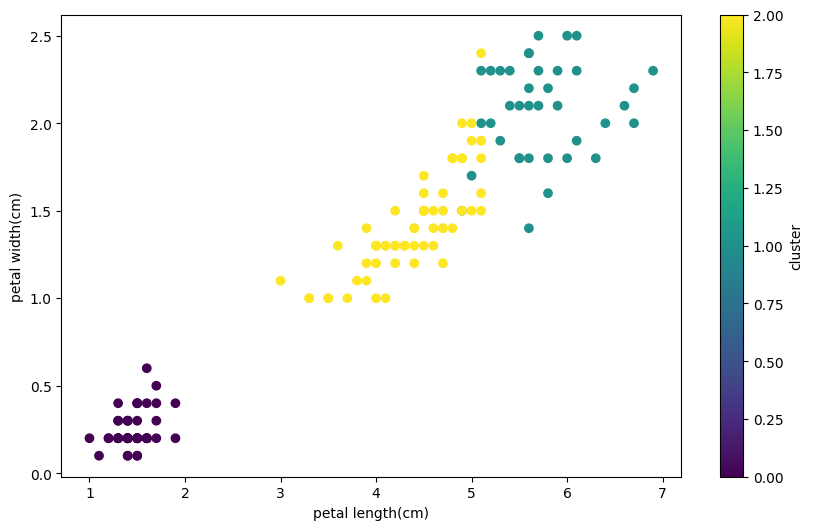

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(iris.data[:,2],iris.data[:,3],c=kmeans.labels_)
plt.xlabel("petal length(cm)")
plt.ylabel("petal width(cm)")
plt.colorbar(label="cluster")

In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(iris.data, kmeans.labels_)
print("Silhouette Score:", score)

Silhouette Score: 0.5528190123564095


###PCA on MNIST dataset

dataset loeading

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
data=fetch_openml("mnist_784")

In [ ]:
n=1000
X=data.data
y=data.target

In [ ]:
X.shape,y.shape

((70000, 784), (70000,))

PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(X)

In [ ]:
print("reduced shape:",reduced.shape)

reduced shape: (70000, 2)


In [ ]:
reduced

array([[ 122.25525533,  316.23384391],
       [1010.49400346,  289.96362059],
       [ -58.99594719, -393.69744499],
       ...,
       [-271.50701323, -590.07850009],
       [-310.22482291,  116.72715081],
       [1058.86212574,   83.39253843]])

visualize

Text(0, 0.5, 'PC2')

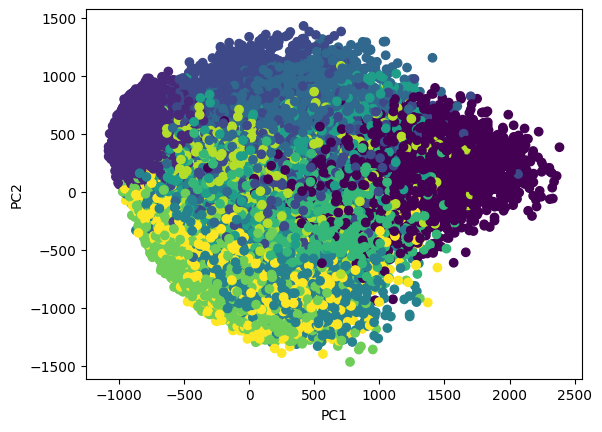

In [ ]:
plt.scatter(reduced[:,0],reduced[:,1],c=y.astype(int))
plt.xlabel("PC1")
plt.ylabel("PC2")

In [ ]:
import pandas as pd
d=pd.DataFrame(reduced,columns=["PC1","PC2"])
d['target']=y
d.head()

,PC1,PC2,target
0,122.255255,316.233844,5
1,1010.494003,289.963621,0
2,-58.995947,-393.697445,4
3,-796.965019,607.421250,1
4,-391.318921,-729.804185,9


<Axes: xlabel='PC1', ylabel='PC2'>

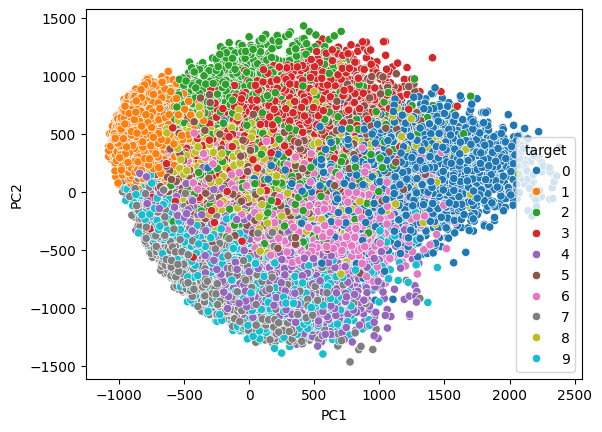

In [ ]:
sns.scatterplot(x='PC1',y="PC2",data=d,hue="target")